In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
file_path = "/content/baby-weights-dataset.csv"
data = pd.read_csv(file_path)

# Drop non-relevant columns (e.g., ID)
data = data.drop(columns=['ID'])

# Define features (X) and target (y)
X = data.drop(columns=['BWEIGHT'])  # Features
y = data['BWEIGHT']  # Target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'int64']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64']).columns.tolist()

# One-hot encode categorical columns and standardize numerical columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [7]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
202

In [8]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

# Make predictions
predictions = model.predict(X_test)

# Show first 5 predictions
print("Predicted Weights:", predictions[:5].flatten())


634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan
Test MAE: nan
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Weights: [nan nan nan nan nan]


Epoch 1/50
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


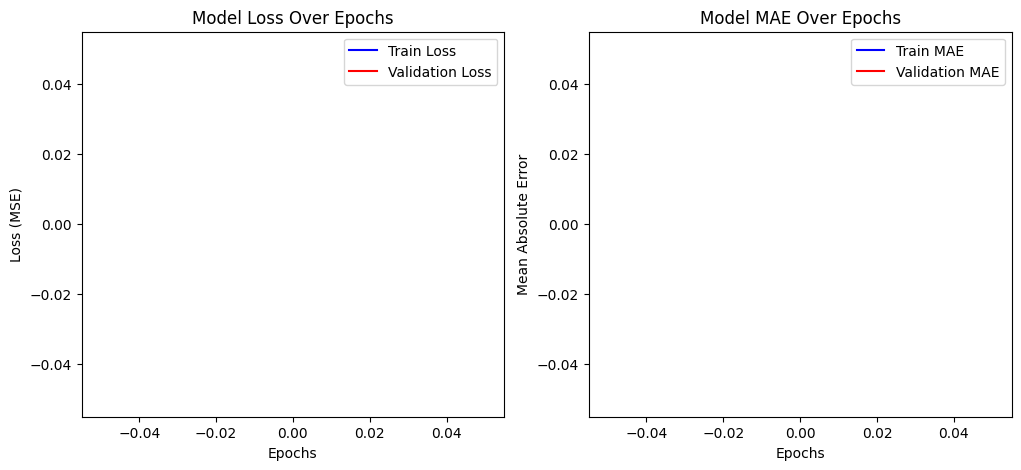

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with 50 epochs
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stop])

# Plot training loss and validation loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss Over Epochs')
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Over Epochs')
plt.legend()

# Show plots
plt.show()


In [11]:
print(history.history.keys())


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Epoch 1/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
2028/2028 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Available history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


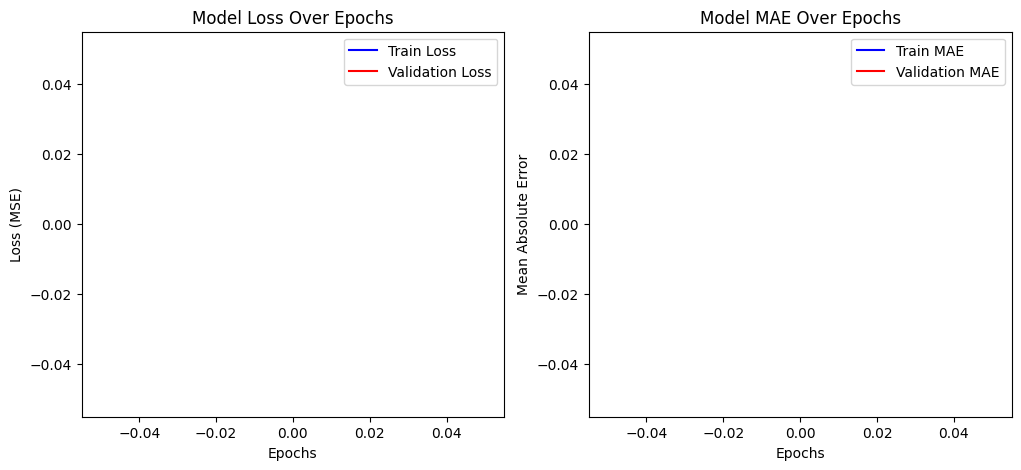

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with 50 epochs
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stop])

# Check available history keys
print("Available history keys:", history.history.keys())

# Plot only if keys exist
plt.figure(figsize=(12, 5))

# Loss Plot
if 'loss' in history.history and 'val_loss' in history.history:
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Model Loss Over Epochs')
    plt.legend()

# MAE Plot
if 'mae' in history.history and 'val_mae' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE', color='blue')
    plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.title('Model MAE Over Epochs')
    plt.legend()

# Show plots
plt.show()


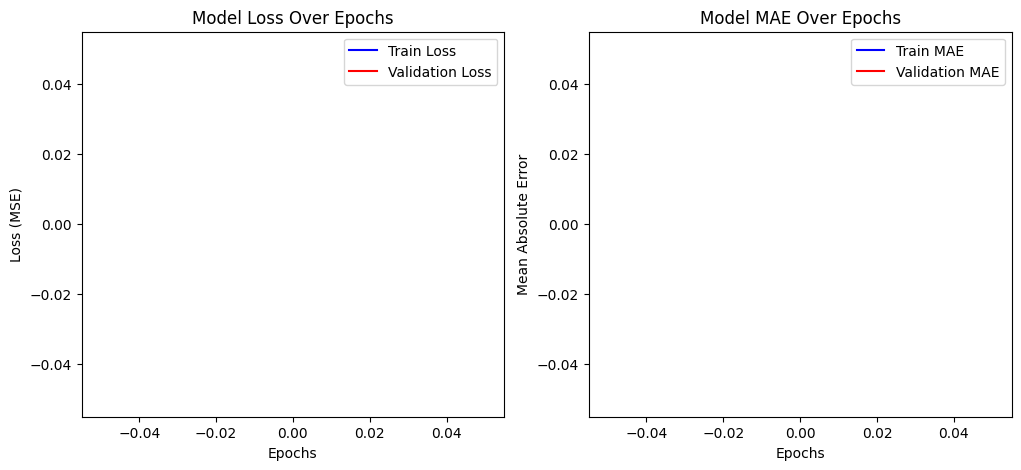

In [16]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss Over Epochs')
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Over Epochs')
plt.legend()

# Show plots
plt.show()


In [17]:
print(history.history)


{'loss': [nan, nan, nan, nan, nan, nan], 'mae': [nan, nan, nan, nan, nan, nan], 'val_loss': [nan, nan, nan, nan, nan, nan], 'val_mae': [nan, nan, nan, nan, nan, nan]}


In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (81120, 297)
y_train shape: (81120,)


In [19]:
print(data.head())  # Show first few rows
print(data.columns)  # Show all column names


   SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  BDEAD  ...  \
0    2        1    33    26.0      10    34   12.0      4       2      0  ...   
1    2        2    19    40.0      10    18   11.0     12       1      0  ...   
2    2        1    33    16.0      14    31   16.0     16       2      0  ...   
3    1        1    25    40.0      15    28   12.0     12       3      0  ...   
4    1        2    21    60.0      13    20   12.0     14       2      0  ...   

   HYPERCH  HYPERPR  ECLAMP  CERVIX  PINFANT PRETERM RENAL  RHSEN  UTERINE  \
0        0        0       0       0        0       0     0      0        0   
1        0        0       0       0        0       0     0      0        0   
2        0        0       0       0        0       0     0      0        0   
3        0        0       0       0        0       0     0      0        0   
4        0        1       0       0        0       0     0      0        0   

   BWEIGHT  
0   4.3750  
1   6.9375  
2   8

In [21]:
from sklearn.model_selection import train_test_split

# Drop missing values to avoid empty dataset
data = data.dropna()

# Print column names to confirm the correct target column
print("Column Names:", data.columns)

# Define features (X) and target (y) using the correct column name
X = data.drop(columns=['BWEIGHT'])  # Drop the target column
y = data['BWEIGHT']

# Print dataset shape to confirm it's not empty
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Column Names: Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC',
       'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM', 'RACEDAD',
       'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC',
       'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH',
       'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN',
       'UTERINE', 'BWEIGHT'],
      dtype='object')
Shape of X: (101395, 35)
Shape of y: (101395,)
X_train shape: (81116, 35)
y_train shape: (81116,)


In [22]:
print("Dataset Shape:", data.shape)
print("Column Names:", data.columns)
print("Missing Values:\n", data.isnull().sum())
print("First few rows:\n", data.head())


Dataset Shape: (101395, 36)
Column Names: Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC',
       'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM', 'RACEDAD',
       'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC',
       'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH',
       'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN',
       'UTERINE', 'BWEIGHT'],
      dtype='object')
Missing Values:
 SEX         0
MARITAL     0
FAGE        0
GAINED      0
VISITS      0
MAGE        0
FEDUC       0
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       0
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      0
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      0
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
BWEIGHT     0
dtype:

In [23]:
if 'BWEIGHT' in data.columns:
    print("✅ 'BWEIGHT' column found!")
    print("Unique values in BWEIGHT:", data['BWEIGHT'].unique())
else:
    print("❌ 'BWEIGHT' column NOT found. Check dataset!")


✅ 'BWEIGHT' column found!
Unique values in BWEIGHT: [ 4.375   6.9375  8.5     9.      8.      7.      7.375   8.1875  7.0625
  6.25    6.375   5.75    8.4375  7.3125  6.8125  7.625   6.0625  6.6875
  7.9375  7.875   3.25    8.9375  6.5     5.125   0.875   9.1875  8.5625
  6.5625  5.6875  9.25    4.6875  6.625   5.375   7.75    7.8125  8.25
  8.0625  7.125   4.25    7.5     4.3125  6.1875  4.75    6.75    4.
  7.5625  5.625   8.125   6.875   7.4375  6.4375  0.625   8.75    8.625
  9.75    7.25    5.9375  8.8125  8.375   5.875   9.3125  6.      7.6875
  3.1875  5.1875  4.5625  4.9375  6.3125  9.8125  6.125   7.1875 10.3125
  8.3125  9.875   4.875   3.9375  5.4375  9.5     9.0625  5.8125  3.875
  2.9375  9.375   0.9375  4.125   9.125   4.1875  5.3125  5.5     3.75
  9.5625 11.75   11.      9.6875  8.6875  4.8125  9.9375  2.25    5.25
  4.625   2.      3.0625 10.1875  5.5625 10.0625  3.5625  0.5625  3.5
  3.625   8.875  12.3125  5.0625  4.0625 11.4375  5.     10.875   9.625
  2.4375  9.437

Saving selected-trend-table-from-health-united-states-2011.-low-birthweight-live-births-by-race-and-hispanic-origin-of-mother-and-state-united-states-2000-2002-2003-2005-and-2006-2008.csv to selected-trend-table-from-health-united-states-2011.-low-birthweight-live-births-by-race-and-hispanic-origin-of-mother-and-state-united-states-2000-2002-2003-2005-and-2006-2008 (1).csv
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 74.5808 - mae: 8.3912 - val_loss: 67.2939 - val_mae: 7.9512
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 65.3628 - mae: 7.8393 - val_loss: 59.1481 - val_mae: 7.4369
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 57.3416 - mae: 7.3060 - val_loss: 51.0454 - val_mae: 6.8845
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 48.2187 - mae: 6.6722 - val_loss: 42.7164 - val_mae: 6.2639
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 40.5349 - mae: 6.0419 - val_loss: 34.1203 - val_mae: 5.5527
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31.6613 - mae: 5.3466 - val_loss: 25.7118 - val_mae: 4.7506
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.5159 - mae: 4.6045 - val_loss: 17.6937 - val_mae: 3.8437
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.4299 - mae: 3.7059 - val_loss: 11.1422 - val_mae: 2.9180
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.9725 - mae: 2.9

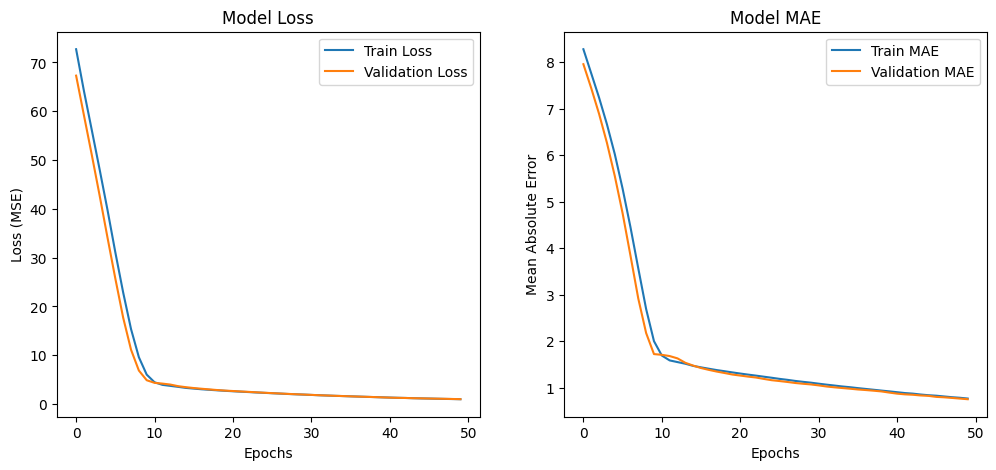

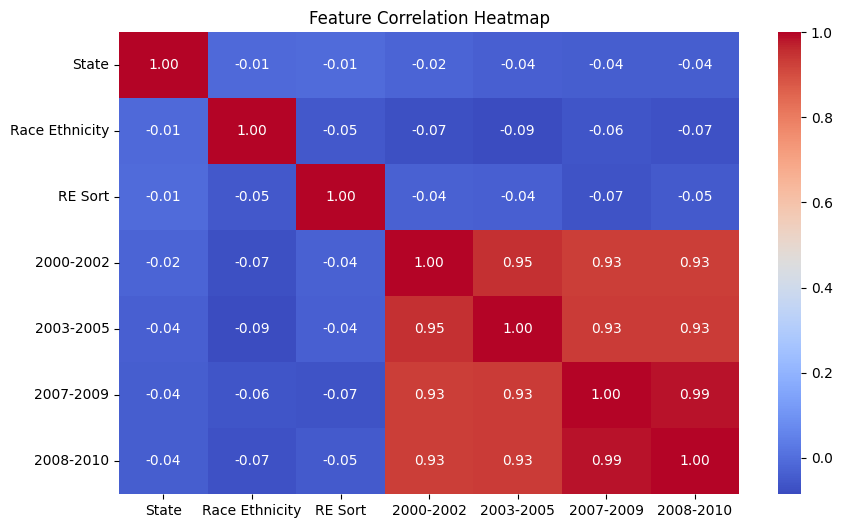

In [25]:

!pip install tensorflow pandas numpy matplotlib seaborn scikit-learn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

data_cleaned = data.drop(columns=['RE Flag', '2000-2002 Flag', '2003-2005 Flag', '2007-2009 Flag', '2008-2010 Flag', 'Location 1'], errors='ignore')

data_cleaned = data_cleaned.dropna()

label_enc_state = LabelEncoder()
label_enc_race = LabelEncoder()

data_cleaned['State'] = label_enc_state.fit_transform(data_cleaned['State'])
data_cleaned['Race Ethnicity'] = label_enc_race.fit_transform(data_cleaned['Race Ethnicity'])

X = data_cleaned.drop(columns=['2008-2010'])
y = data_cleaned['2008-2010']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Model MAE')

plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
